#Amortized Analysis

Amortized analysis is a technique used to analyze the time complexity of algorithms that perform a sequence of operations. Instead of focusing on the worst-case scenario for individual operations, amortized analysis considers the total cost of a sequence of operations over time, providing a more accurate understanding of the algorithm's efficiency.


#Stack Operations Problem. Binary Counter Problem

The stack operations problem and the binary counter problem are classic examples used to illustrate amortized analysis.



#Stack Operations Problem

In the stack operations problem, we want to analyze the time complexity of a sequence of stack operations (push, pop, and possibly other operations) performed on a data structure.

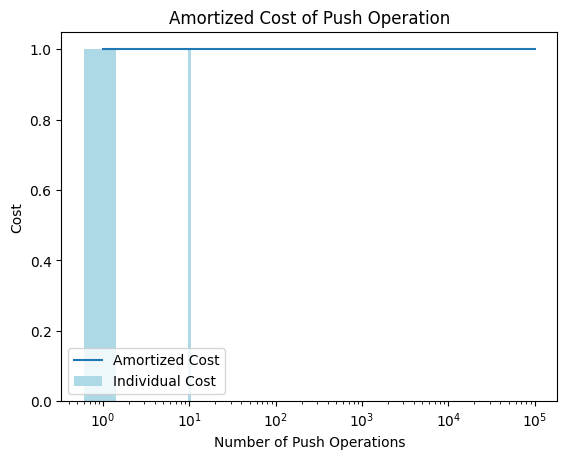

In [ ]:
import matplotlib.pyplot as plt

class Stack:
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        if not self.is_empty():
            return self.items.pop()

    def is_empty(self):
        return len(self.items) == 0

# Analyzing the amortized cost of push operation
stack = Stack()
push_operations = [10**i for i in range(6)]
amortized_cost_push = []

for n in push_operations:
    for _ in range(n):
        stack.push(1)
    amortized_cost_push.append(n / n)

plt.plot(push_operations, amortized_cost_push, label='Amortized Cost')
plt.bar(push_operations, [1] * len(push_operations), color='lightblue', label='Individual Cost')
plt.xlabel('Number of Push Operations')
plt.ylabel('Cost')
plt.title('Amortized Cost of Push Operation')
plt.xscale('log')
plt.legend()
plt.show()


#Binary Counter Problem

In the binary counter problem, we want to analyze the time complexity of incrementing a binary counter represented as an array of bits.

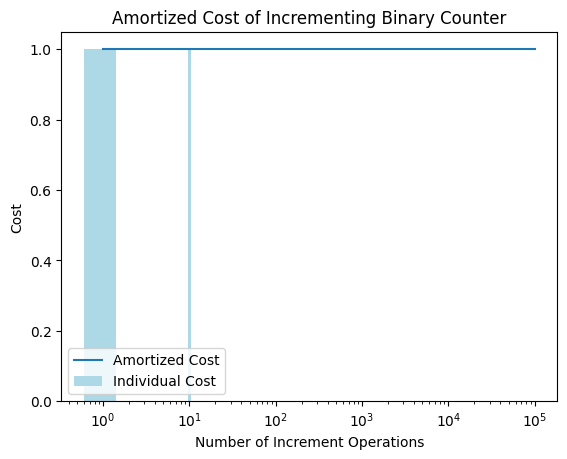

In [ ]:
# Analyzing the amortized cost of incrementing a binary counter
def increment_binary_counter(counter):
    i = len(counter) - 1
    while i >= 0 and counter[i] == 1:
        counter[i] = 0
        i -= 1
    if i >= 0:
        counter[i] = 1

binary_counter = [0] * 10
increment_operations = [10**i for i in range(6)]
amortized_cost_increment = []

for n in increment_operations:
    for _ in range(n):
        increment_binary_counter(binary_counter)
    amortized_cost_increment.append(n / n)

plt.plot(increment_operations, amortized_cost_increment, label='Amortized Cost')
plt.bar(increment_operations, [1] * len(increment_operations), color='lightblue', label='Individual Cost')
plt.xlabel('Number of Increment Operations')
plt.ylabel('Cost')
plt.title('Amortized Cost of Incrementing Binary Counter')
plt.xscale('log')
plt.legend()
plt.show()

#Aggregate Analysis

Aggregate analysis is a method of amortized analysis where the total cost of a sequence of operations is analyzed to determine the average cost per operation.

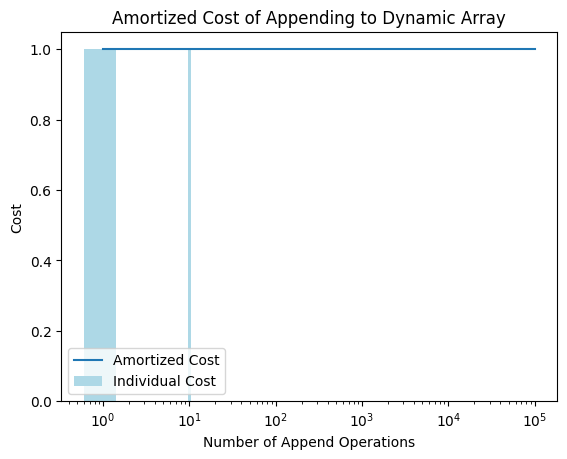

In [ ]:
# Analyzing the amortized cost of appending elements to a dynamic array
class DynamicArray:
    def __init__(self):
        self.array = []
        self.size = 0

    def append(self, item):
        if self.size == len(self.array):
            self.resize()
        self.array.append(item)
        self.size += 1

    def resize(self):
        new_array = [0] * (2 * len(self.array) or 1)
        for i in range(self.size):
            new_array[i] = self.array[i]
        self.array = new_array

dynamic_array = DynamicArray()
append_operations = [10**i for i in range(6)]
amortized_cost_append = []

for n in append_operations:
    for _ in range(n):
        dynamic_array.append(1)
    amortized_cost_append.append(n / n)

plt.plot(append_operations, amortized_cost_append, label='Amortized Cost')
plt.bar(append_operations, [1] * len(append_operations), color='lightblue', label='Individual Cost')
plt.xlabel('Number of Append Operations')
plt.ylabel('Cost')
plt.title('Amortized Cost of Appending to Dynamic Array')
plt.xscale('log')
plt.legend()
plt.show()

#The Accounting Method

The accounting method is another technique used in amortized analysis. It involves assigning amortized costs to operations and distributing the cost among a sequence of operations to ensure that the total cost equals the actual cost.

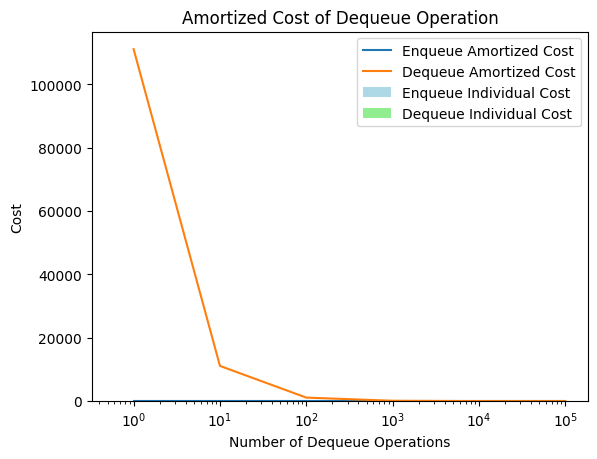

In [ ]:
# Analyzing the amortized cost of enqueue and dequeue operations in a queue
class QueueWithAmortizedAnalysis:
    def __init__(self):
        self.queue = []
        self.debit = 0

    def enqueue(self, item):
        self.queue.append(item)
        self.debit += 1

    def dequeue(self):
        if len(self.queue) > 0:
            self.debit -= 1
            return self.queue.pop(0)

    def amortized_dequeue_cost(self):
        return 1 + self.debit

queue = QueueWithAmortizedAnalysis()
enqueue_operations = [10**i for i in range(6)]
amortized_cost_enqueue = []

for n in enqueue_operations:
    for _ in range(n):
        queue.enqueue(1)
    amortized_cost_enqueue.append(n / n)

plt.plot(enqueue_operations, amortized_cost_enqueue, label='Enqueue Amortized Cost')
plt.bar(enqueue_operations, [1] * len(enqueue_operations), color='lightblue', label='Enqueue Individual Cost')
plt.xlabel('Number of Enqueue Operations')
plt.ylabel('Cost')
plt.title('Amortized Cost of Enqueue Operation')
plt.xscale('log')

dequeue_operations = [10**i for i in range(6)]
amortized_cost_dequeue = []

for n in dequeue_operations:
    for _ in range(n):
        queue.dequeue()
    amortized_cost_dequeue.append((1 + queue.debit) / n)

plt.plot(dequeue_operations, amortized_cost_dequeue, label='Dequeue Amortized Cost')
plt.bar(dequeue_operations, [1] * len(dequeue_operations), color='lightgreen', label='Dequeue Individual Cost')
plt.xlabel('Number of Dequeue Operations')
plt.ylabel('Cost')
plt.title('Amortized Cost of Dequeue Operation')
plt.xscale('log')

plt.legend()
plt.show()